In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import os
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
import future 
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
seed = 100
np.random.seed(seed)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import pandas as pd

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [10]:
path=os.getcwd()+'\\DATA\\picture_mix_train'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')     
print(read_images.shape) 

Images are all in read_images
(30000, 100, 100)


In [11]:
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,7),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Shape of x_train is (24000,100,100,1)
Shape of x_test is (6000,100,100,1)
Shape of y_train is (24000,1)
Shape of y_test is (6000,1)
Shape of y_train is (24000,6)


# epoch=60 第2次


In [ ]:
# model_mix_vgg_60_2
def VGG16(include_top=True,input_tensor=None, input_shape=(100,100,1),
          pooling='max',classes=1000):
    global model_mix_vgg_60_2
    model_mix_vgg_60_2 = Sequential([
        Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
               activation='relu'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001), 
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(6,activation = 'softmax')
        ])
VGG16()

#####################################################################

tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf')) 
                                                     
filepath="C:\\Users\\user\\Desktop\\project\\VGG16_picture_mix\\checkpoint60_record\\model_iter60_2.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')

model_mix_vgg_60_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

train_history_60_2 = model_mix_vgg_60_2.fit(x=x_train, y=y_train, validation_split=0.3, epochs=60, batch_size=80, verbose=2, shuffle = True, callbacks = [checkpoint , tensorboard])  

                                                                       #改
with open(file=r'C:\Users\user\Desktop\project\VGG16_picture_mix\train_history_60\train_history_60_2.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_60_2.history, outhis) 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 16800 samples, validate on 7200 samples
Epoch 1/60

Epoch 00001: acc improved from -inf to 0.26006, saving model to C:\Users\user\Desktop\project\VGG16_picture_mix\checkpoint60_record\model_iter60_2.hdf5
16800/16800 - 70s - loss: 2.0012 - acc: 0.2601 - val_loss: 1.6859 - val_acc: 0.2843
Epoch 2/60

Epoch 00002: acc improved from 0.26006 to 0.39905, saving model to C:\Users\user\Desktop\project\VGG16_picture_mix\checkpoint60_record\model_iter60_2.hdf5
16800/16800 - 65s - loss: 1.3739 - acc: 0.3990 - val_loss: 1.5244 - val_acc: 0.3375
Epoch 3/60

Epoch 00003: acc improved from 0.39905 to 0.51220, saving model to C:\Users\user\Desktop\project\VGG16_picture_mix\checkpoint60_record\model_iter60_2.hdf5
16800/16800 - 65s - loss: 1.1788 - acc: 0.5122 - val_loss: 3.2669 - val_acc: 0.2792
Epoch 4/60

Epoch 00004: acc improved from 0.51220 to 0.60345, saving model to C:\U

Epoch 34/60

Epoch 00034: acc improved from 0.97262 to 0.98065, saving model to C:\Users\user\Desktop\project\VGG16_picture_mix\checkpoint60_record\model_iter60_2.hdf5
16800/16800 - 65s - loss: 0.0579 - acc: 0.9807 - val_loss: 0.2549 - val_acc: 0.9258
Epoch 35/60

Epoch 00035: acc did not improve from 0.98065
16800/16800 - 65s - loss: 0.0702 - acc: 0.9770 - val_loss: 0.2644 - val_acc: 0.9360
Epoch 36/60

Epoch 00036: acc did not improve from 0.98065
16800/16800 - 65s - loss: 0.0668 - acc: 0.9774 - val_loss: 0.2118 - val_acc: 0.9331
Epoch 37/60

Epoch 00037: acc improved from 0.98065 to 0.98173, saving model to C:\Users\user\Desktop\project\VGG16_picture_mix\checkpoint60_record\model_iter60_2.hdf5
16800/16800 - 65s - loss: 0.0548 - acc: 0.9817 - val_loss: 0.5163 - val_acc: 0.8771
Epoch 38/60

Epoch 00038: acc did not improve from 0.98173
16800/16800 - 65s - loss: 0.0706 - acc: 0.9746 - val_loss: 0.2380 - val_acc: 0.9261
Epoch 39/60

Epoch 00039: acc did not improve from 0.98173
16800/16

# epoch=60 第1次

In [4]:
# model_mix_vgg_60_1
def VGG16(include_top=True,input_tensor=None, input_shape=(100,100,1),
          pooling='max',classes=1000):
    global model_mix_vgg_60_1
    model_mix_vgg_60_1 = Sequential([
        Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
               activation='relu'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        Conv2D(256, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001), 
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        Conv2D(512, (3, 3), activation='relu', padding='same',),
        BatchNormalization(momentum=0.99, epsilon=0.001),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(6,activation = 'softmax')
        ])
VGG16()

#####################################################################

tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf')) 
                                                     
filepath="C:\\Users\\user\\Desktop\\project\\VGG16_picture_mix\\checkpoint60_record\\model_iter60_1.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')

model_mix_vgg_60_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

train_history_60_1 = model_mix_vgg_60_1.fit(x=x_train, y=y_train, validation_split=0.3, epochs=60, batch_size=80, verbose=2, shuffle = True, callbacks = [checkpoint , tensorboard])  

                                                                       #改
with open(file=r'C:\Users\user\Desktop\project\VGG16_picture_mix\train_history_60\train_history_60_1.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_60_1.history, outhis) 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 16800 samples, validate on 7200 samples
Epoch 1/60

Epoch 00001: acc improved from -inf to 0.32619, saving model to C:\Users\user\Desktop\project\VGG16_picture_mix\checkpoint60_record\model_iter60_1.hdf5
16800/16800 - 71s - loss: 1.8783 - acc: 0.3262 - val_loss: 1.7002 - val_acc: 0.3553
Epoch 2/60

Epoch 00002: acc improved from 0.32619 to 0.42577, saving model to C:\Users\user\Desktop\project\VGG16_picture_mix\checkpoint60_record\model_iter60_1.hdf5
16800/16800 - 65s - loss: 1.2415 - acc: 0.4258 - val_loss: 1.4798 - val_acc: 0.3479
Epoch 3/60

Epoch 00003: acc improved from 0.42577 to 0.54917, saving model to C:\Users\user\Desktop\project\VGG16_picture_mix\checkpoint60_record\model_iter60_1.hdf5
16800/16800 - 65s - loss: 1.0293 - acc: 0.5492 - val_loss: 1.5562 - val_acc: 0.4333
Epoch 4/60

Epoch 00004: acc improved from 0.54917 to 0.63631, saving model to C:\U

Epoch 35/60

Epoch 00035: acc did not improve from 0.98393
16800/16800 - 65s - loss: 0.0772 - acc: 0.9735 - val_loss: 0.1338 - val_acc: 0.9582
Epoch 36/60

Epoch 00036: acc did not improve from 0.98393
16800/16800 - 65s - loss: 0.0635 - acc: 0.9788 - val_loss: 0.1802 - val_acc: 0.9283
Epoch 37/60

Epoch 00037: acc did not improve from 0.98393
16800/16800 - 65s - loss: 0.0950 - acc: 0.9728 - val_loss: 0.1462 - val_acc: 0.9563
Epoch 38/60

Epoch 00038: acc did not improve from 0.98393
16800/16800 - 65s - loss: 0.0508 - acc: 0.9824 - val_loss: 0.1782 - val_acc: 0.9326
Epoch 39/60

Epoch 00039: acc did not improve from 0.98393
16800/16800 - 65s - loss: 0.0604 - acc: 0.9803 - val_loss: 1.9661 - val_acc: 0.8942
Epoch 40/60

Epoch 00040: acc improved from 0.98393 to 0.98601, saving model to C:\Users\user\Desktop\project\VGG16_picture_mix\checkpoint60_record\model_iter60_1.hdf5
16800/16800 - 65s - loss: 0.0410 - acc: 0.9860 - val_loss: 0.1515 - val_acc: 0.9565
Epoch 41/60

Epoch 00041: acc imp

In [12]:
dirpath=r'C:\Users\user\Desktop\project\VGG16_picture_mix\checkpoint60_record\*.*' #train_history資料夾
filename=glob.glob(dirpath)
filename

['C:\\Users\\user\\Desktop\\project\\VGG16_picture_mix\\checkpoint60_record\\model_iter60_1.hdf5',
 'C:\\Users\\user\\Desktop\\project\\VGG16_picture_mix\\checkpoint60_record\\model_iter60_10.hdf5',
 'C:\\Users\\user\\Desktop\\project\\VGG16_picture_mix\\checkpoint60_record\\model_iter60_2.hdf5',
 'C:\\Users\\user\\Desktop\\project\\VGG16_picture_mix\\checkpoint60_record\\model_iter60_3.hdf5',
 'C:\\Users\\user\\Desktop\\project\\VGG16_picture_mix\\checkpoint60_record\\model_iter60_4.hdf5',
 'C:\\Users\\user\\Desktop\\project\\VGG16_picture_mix\\checkpoint60_record\\model_iter60_5.hdf5',
 'C:\\Users\\user\\Desktop\\project\\VGG16_picture_mix\\checkpoint60_record\\model_iter60_6.hdf5',
 'C:\\Users\\user\\Desktop\\project\\VGG16_picture_mix\\checkpoint60_record\\model_iter60_7.hdf5',
 'C:\\Users\\user\\Desktop\\project\\VGG16_picture_mix\\checkpoint60_record\\model_iter60_8.hdf5',
 'C:\\Users\\user\\Desktop\\project\\VGG16_picture_mix\\checkpoint60_record\\model_iter60_9.hdf5']

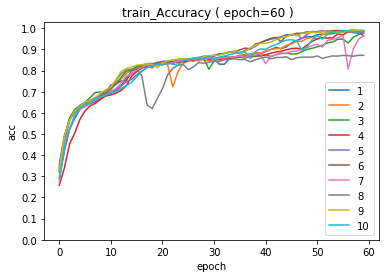

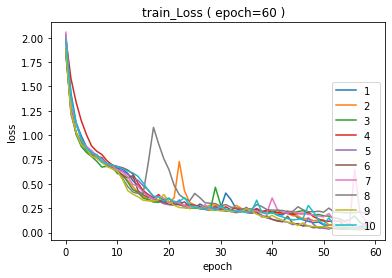

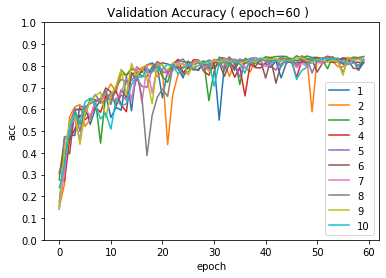

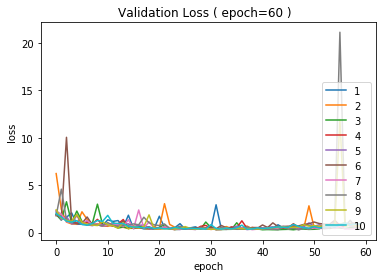

In [17]:
# 60
dirpath=r'C:\Users\user\Desktop\project\VGG16_picture2\train_history_60\*.*' #train_history資料夾
filename=glob.glob(dirpath)
filename
########## train acc  60


for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['acc'],label=i+1)
        
    plt.xlabel('epoch') 
    plt.ylabel('acc')
    plt.title('train_Accuracy ( epoch=60 )  ') #要改
    plt.legend(loc=4)
    plt.yticks(np.linspace(0,1,11))
    
#plt.savefig(r'C:\Users\user\Desktop\project\VGG16_picture2\image_save\train_acc_60.jpg')    #匯出到資料夾 
plt.show()

############## train loss  60



for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['loss'],label=i+1)
        
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('train_Loss ( epoch=60 )  ') #epoch要改
    plt.legend(loc=4)    
#plt.savefig(r'C:\Users\user\Desktop\project\VGG16_picture2\image_save\train_loss_60.jpg')     
plt.show()


################ val acc  60


for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['val_acc'],label=i+1)

    plt.xlabel('epoch') 
    plt.ylabel('acc')
    plt.title('Validation Accuracy ( epoch=60 )  ') #要改
    plt.legend(loc=4)
    plt.yticks(np.linspace(0,1,11))
    
#plt.savefig(r'C:\Users\user\Desktop\project\VGG16_picture2\image_save\val_acc_60.jpg') 
plt.show()

############# val loss 60

for i in range(0,10):
    with open(file=filename[i],mode="rb") as inhis :  
        a = pickle.load(file=inhis)                
                                                 
                                                 
        plt.plot(a['val_loss'],label=i+1)

    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Validation Loss ( epoch=60 )  ') #epoch要改
    plt.legend(loc=4)
   
    
#plt.savefig(r'C:\Users\user\Desktop\project\VGG16_picture2\image_save\val_loss_60.jpg') 
plt.show()

In [19]:
dirpath1=r'C:\Users\user\Desktop\project\VGG16_picture_mix\checkpoint60_record\*.*' #checkpoint30_record資料夾
filename2=glob.glob(dirpath1)


test_acc=[]
test_loss=[]

for i in range(0,10):
    
    tf.keras.backend.clear_session()
    model=load_model(filename2[i])
    a=model.evaluate(x=x_test,y=y_test)
    test_acc.append(a[1])
    test_loss.append(a[0])

print("10次test_loss平均={}".format(round(sum(test_loss)/len(test_loss),3)))
print("10次test_acc平均={}".format(round(sum(test_acc)/len(test_acc),3) ))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
6000/6000 [==============================] - 7s 1ms/sample - loss: 0.3025 - acc: 0.9398
10次test_loss平均=0.295
10次test_acc平均=0.936


# 單一 6類的 model vgg

In [2]:
path='C:\\Users\\user\\Desktop\\project\\picture_mix_train'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')     
print(read_images.shape) 

Images are all in read_images
(30000, 100, 100)


In [3]:
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,7),5000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Shape of x_train is (24000,100,100,1)
Shape of x_test is (6000,100,100,1)
Shape of y_train is (24000,1)
Shape of y_test is (6000,1)
Shape of y_train is (24000,6)


In [9]:
model=load_model(r'C:\Users\user\Desktop\project\VGG16_picture_mix\checkpoint60_record\model_iter60_6.hdf5') 

In [6]:
from sklearn.metrics import confusion_matrix
import itertools


In [7]:

def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
   
    plt.title('(vgg16_mix)'+title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.savefig(r'C:\Users\user\Desktop\project\compare\model_picture2_incv3_gray_100.jpg') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)

6000/6000 [==============================] - 7s 1ms/sample - loss: 0.2234 - acc: 0.9623


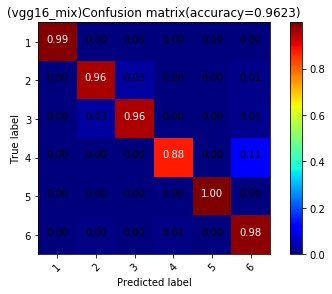

In [10]:
a=model.evaluate(x_test,y_test)
plot_confuse(model, x_test, y_test,round(a[1],4))

#  mix

In [3]:
path='C:\\Users\\user\\Desktop\\project\\test'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')     
print(read_images.shape) 

Images are all in read_images
(600, 100, 100)


In [4]:
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,4),200).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()

print('Shape of y_test_ori is (%d,%d)'%(y_test_ori.shape))

Shape of x_train is (300,100,100,1)
Shape of x_test is (300,100,100,1)
Shape of y_train is (300,1)
Shape of y_test is (300,1)
Shape of y_test_ori is (300,1)


In [ ]:
# 算分類 accuracy

In [5]:
# predict=model.predict(x_test)
# 單看三種混合的準確度---兩個都對，才算對


def type3_mix_accuracy(y_test_ori,predict):
    y_test_ori=pd.DataFrame(y_test_ori)
    y_test_ori=y_test_ori.rename(columns={0:'truelabel'})
    y_test_ori['true01']=np.where(y_test_ori['truelabel']==1,1,np.where(y_test_ori['truelabel']==2,3,4))
    y_test_ori['true02']=np.where(y_test_ori['truelabel']==1,2,np.where(y_test_ori['truelabel']==2,4,5))
  
    a=pd.DataFrame(predict)
    a=a.rename(columns={0:1, 1:2,2:3,3:4,4:5,5:6})

    a['max_value']=a.max(axis=1)
    a['second_large_value']=0
   

    a['max']=np.argmax(predict,axis=1)+1
    a['second_large']=0
 
    

    for i in range(0,(a.shape[0])):
        tmp_list=0
        num_list=a.iloc[i,0:6]
        tmp_list=sorted(num_list)
        a['second_large_value'].iloc[i]=tmp_list[-2]
        a['second_large'].iloc[i]=np.where(num_list==tmp_list[-2])[0][0]+1
        
   
        
        
    b = pd.merge(y_test_ori, a, how='left',on=y_test_ori.index)
    b['acc']=0

    for i in range(0,(b.shape[0])):
        con1=[str(b['true01'][i]),str(b['true02'][i])]
        con1=sorted(con1)
        con2=[str(b['max'][i]),str(b['second_large'][i])]
        con2=sorted(con2)

        b['acc'].iloc[i]=np.where(con1==con2,1,0)

    return (print('三種混合的準確率{}'.format(b['acc'].sum()/b.shape[0])))

In [6]:
# vgg

model=load_model(r'C:\Users\user\Desktop\project\final_model\vgg_picture_mix\model_iter60_10.hdf5') 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
predict=model.predict(x_test)

In [14]:
type3_mix_accuracy(y_test_ori,predict)

三種混合的準確率0.01


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
# inception v3

model01=load_model(r'C:\Users\user\Desktop\project\final_model\inceptionv3_picture_mix\model_iter60_8.hdf5') 

In [16]:
predict01=model01.predict(x_test)

In [17]:
type3_mix_accuracy(y_test_ori,predict01)

三種混合的準確率0.03333333333333333


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
# 

In [18]:
y_test_ori=pd.DataFrame(y_test_ori)
y_test_ori=y_test_ori.rename(columns={0:'truelabel'})
y_test_ori['true01']=np.where(y_test_ori['truelabel']==1,1,np.where(y_test_ori['truelabel']==2,3,4))
y_test_ori['true02']=np.where(y_test_ori['truelabel']==1,2,np.where(y_test_ori['truelabel']==2,4,5))

In [19]:
a=pd.DataFrame(predict)
a=a.rename(columns={0:1, 1:2,2:3,3:4,4:5,5:6})

a['max_value']=a.max(axis=1)
a['second_large_value']=0
   

a['max']=np.argmax(predict,axis=1)+1
a['second_large']=0
 
    

for i in range(0,(a.shape[0])):
    tmp_list=0
    num_list=a.iloc[i,0:6]
    tmp_list=sorted(num_list)
    a['second_large_value'].iloc[i]=tmp_list[-2]
    a['second_large'].iloc[i]=np.where(num_list==tmp_list[-2])[0][0]+1  

In [20]:
b = pd.merge(y_test_ori, a, how='left',on=y_test_ori.index)
b['acc']=0

for i in range(0,(b.shape[0])):
    con1=[str(b['true01'][i]),str(b['true02'][i])]
    con1=sorted(con1)
    con2=[str(b['max'][i]),str(b['second_large'][i])]
    con2=sorted(con2)
    b['acc'].iloc[i]=np.where(con1==con2,1,0)

In [21]:
b[0:30]

,key_0,truelabel,true01,true02,1,2,3,4,5,6,max_value,second_large_value,max,second_large,acc
0,0,2,3,4,6.701560e-08,7.174966e-09,9.545212e-07,9.979237e-01,4.348656e-10,2.075115e-03,0.997924,2.075115e-03,4,6,0
1,1,2,3,4,4.344450e-06,8.656499e-06,2.160700e-05,9.811668e-01,2.103320e-05,1.877757e-02,0.981167,1.877757e-02,4,6,0
2,2,2,3,4,5.657250e-04,9.606896e-05,4.576630e-02,5.810917e-02,2.024436e-05,8.954425e-01,0.895442,5.810917e-02,6,4,0
3,3,2,3,4,7.655952e-07,3.346338e-07,1.599247e-06,9.982199e-01,3.431579e-06,1.774084e-03,0.998220,1.774084e-03,4,6,0
4,4,3,4,5,9.685836e-05,1.245710e-04,2.852321e-04,2.572115e-01,1.889034e-04,7.420930e-01,0.742093,2.572115e-01,6,4,0
5,5,3,4,5,4.506249e-04,5.812179e-04,2.242279e-03,6.933743e-02,6.451224e-04,9.267434e-01,0.926743,6.933743e-02,6,4,0
6,6,2,3,4,2.694672e-04,1.361273e-03,4.895853e-04,4.118039e-02,3.652450e-04,9.563340e-01,0.956334,4.118039e-02,6,4,0
7,7,1,1,2,1.000000e+00,1.434275e-17,4.764765e-16,1.326840e-08,6.156594e-23,6.599215e-09,1.000000,1.326840e-08,1,4,0
8,8,1,1,2,1.980704e-01,4.635619e-01,1.889786e-02,2.174825e-01,4.386453e-03,9.760089e-02,0.463562,2.174825e-01,2,4,0
9,9,1,1,2,9.904874e-01,1.929054e-08,5.825887e-08,1.344901e-03,9.612433e-11,8.167606e-03,0.990487,8.167606e-03,1,6,0
